In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set_theme(palette = 'flare')
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import joblib
%matplotlib inline

In [71]:
iris = load_iris()
iris_data = pd.DataFrame(data = iris.data,columns = iris.feature_names)
iris_data['label'] = iris.target.astype(int)

In [72]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [73]:
iris_data.shape

(150, 5)

In [74]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [75]:
iris_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [76]:
iris_data['label'].unique()

array([0, 1, 2])

In [77]:
iris_data['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

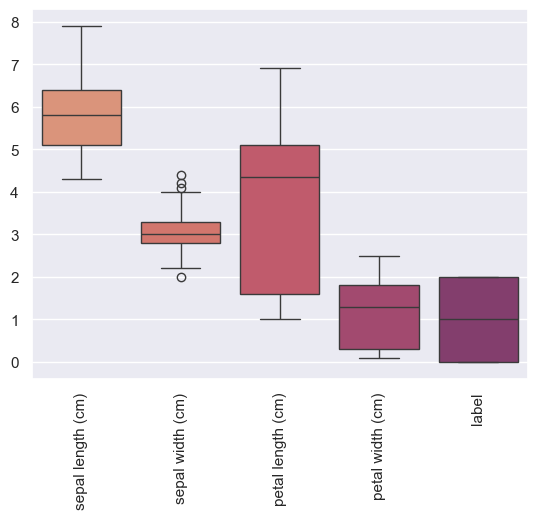

In [78]:
sns.boxplot(iris_data)
plt.xticks(rotation='vertical')
plt.show()

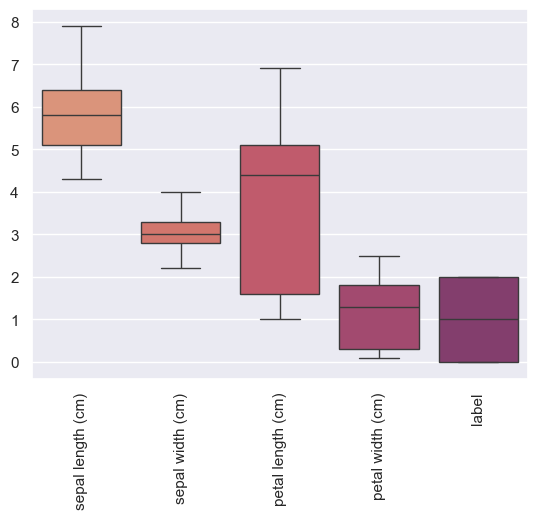

In [79]:
cols = ['sepal width (cm)','sepal length (cm)']
for col in cols:
    
    q1 = np.percentile(iris_data[col],25)
    q3 = np.percentile(iris_data[col],75)

    IQR = q3-q1

    lwr_bound = q1-1.5*IQR
    upr_bound = q3+1.5*IQR

    iris_data = iris_data[(iris_data[col] >= lwr_bound) & (iris_data[col] <= upr_bound)]
    
sns.boxplot(iris_data)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
X = iris_data.drop(columns = 'label')
y = iris_data['label']
y = y.replace({0:'setosa',1:'versicolor',2:'virginica'})

In [81]:
iris_data.label.unique()

array([0, 1, 2])

In [82]:
train_X,test_X,train_y,test_y = train_test_split(X,y)

In [83]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [84]:
clf = RandomForestClassifier()
params = {
    'n_estimators' : [50,100,150],
    'max_depth' : [5,8,10],
    'min_samples_split' : [2,3,5],
    'max_features' : ['sqrt','log2']
}
grid = GridSearchCV(estimator = clf,param_grid = params, cv = 5)

In [85]:
grid.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [86]:
grid.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 100}

In [87]:
clf1 = RandomForestClassifier(max_depth = 5,max_features = 'sqrt',min_samples_split = 3,n_estimators = 50)
clf2 = SVC(C=1.0)
clf3 = KNeighborsClassifier(n_neighbors = 5)

In [89]:
eclf = VotingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('knn', clf3)],voting='hard')

In [90]:
eclf.fit(train_X,train_y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_split=3,
                                                     n_estimators=50)),
                             ('svc', SVC()), ('knn', KNeighborsClassifier())])

In [91]:
cvs = cross_val_score(eclf,train_X,train_y)
print(f'minimum accuracy on train samples: {round(cvs.min()*100,2)}%')
print(f'average accuracy on train samples: {round(cvs.mean()*100,2)}%')
print(f'max accuracy on train samples: {round(cvs.max()*100,2)}%')

minimum accuracy on train samples: 95.45%
average accuracy on train samples: 97.27%
max accuracy on train samples: 100.0%


In [92]:
preds = eclf.predict(test_X)
print(f'accuracy on test samples: {round(accuracy_score(test_y,preds)*100,2)}%')

accuracy on test samples: 97.3%


In [93]:
joblib.dump(eclf, 'model.pkl')

['model.pkl']